In [83]:
%run utils.py
%run evaluate.py

In [41]:
ae_train("data/signal/base_3/*.h5", "data/background/base_3/*.h5", 8, epochs=50)

found 3 matches with search '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/autoencode/data/summary/hlf_eflow3_8_v*'
found 0 matches with search '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/autoencode/data/summary/hlf_eflow3_8_v3'
h5_elt 'metric_names' :: creating group 'data' in file 'hlf_eflow3_8_v3.h5'
h5_elt 'metric_names' :: creating dataset 'data/metric_names' in file 'hlf_eflow3_8_v3.h5'
h5_elt 'training' :: creating group 'params' in file 'hlf_eflow3_8_v3.h5'
h5_elt 'training' :: creating dataset 'params/training' in file 'hlf_eflow3_8_v3.h5'
h5_elt 'config' :: creating dataset 'params/config' in file 'hlf_eflow3_8_v3.h5'
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (InputLayer)         (None, 19)                0         
_________________________________________________________________
encoder (Model)              (None, 8)       

{'ae': <keras.engine.training.Model at 0x7f1da76c7390>,
 'aes': base_autoencoder :: Current Structure:
 base_autoencoder :: layer_1: 19 nodes ['relu', None, 'zeros', 'glorot_uniform']
 base_autoencoder :: layer_2: 30 nodes ['relu', None, 'zeros', 'glorot_uniform']
 base_autoencoder :: layer_3: 30 nodes ['relu', None, 'zeros', 'glorot_uniform']
 base_autoencoder :: layer_4: 8 nodes ['relu', None, 'zeros', 'glorot_uniform']
 base_autoencoder :: layer_5: 30 nodes ['relu', None, 'zeros', 'glorot_uniform']
 base_autoencoder :: layer_6: 30 nodes ['relu', None, 'zeros', 'glorot_uniform']
 base_autoencoder :: layer_7: 19 nodes ['linear', None, 'zeros', 'glorot_uniform'],
 'all_train':             Eta       Phi           Pt           M  ChargedFraction       PTD  \
 64792  0.346148  1.269514  1003.940125   68.959671         0.522727  0.307294   
 64793  1.103498 -1.782153   228.147293    9.445394         0.600000  0.484534   
 60546  0.814169  1.439214   783.348938   96.011070         0.583333 

In [81]:
e = ae_evaluation("hlf_eflow3_8_v3")`

found 1 matches with search '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/autoencode/data/summary/hlf_eflow3_8_v3.summary'
/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/autoencode/data/training_runs/hlf_eflow3_8_v3
h5_elt 'metric_names' :: loading dataset 'data/metric_names' from file 'hlf_eflow3_8_v3.h5'
h5_elt 'training' :: loading dataset 'params/training' from file 'hlf_eflow3_8_v3.h5'
h5_elt 'config' :: loading dataset 'params/config' from file 'hlf_eflow3_8_v3.h5'
h5_elt 'loss' :: loading dataset 'metric_names/loss' from file 'hlf_eflow3_8_v3.h5'
h5_elt 'lr' :: loading dataset 'metric_names/lr' from file 'hlf_eflow3_8_v3.h5'
h5_elt 'val_loss' :: loading dataset 'metric_names/val_loss' from file 'hlf_eflow3_8_v3.h5'
train_shell :: using saved model


In [53]:
for attr in ['test', 'train', 'qcd', 'signal', 'val', 'val_norm', 'signal_norm']:
    print attr, ':', (ret[attr] == getattr(e, attr)).all().all()
    

test : True
train : True
qcd : True
signal : True
val : True
val_norm : True
signal_norm : True


In [80]:
d = e.cut_at_threshold(0.1, metric='mae')
for k in d:
    s = 0
    print k +":"
    for subk in d[k]:
        print " -", str(subk) + ":", d[k][subk].shape
        s += len(d[k][subk])
    print " - size:", s
print " - og signal size:", len(e.signal)/2
print " - og test size:", len(e.test)/2


signal:
 - 0: (9286,)
 - 1: (11832,)
 - 2: (3640,)
 - size: 24758
qcd:
 - 0: (7492,)
 - 1: (259,)
 - 2: (6,)
 - size: 7757
 - og signal size: 24758
 - og test size: 7757


data_table :: plotting distrubution(s) for table(s) ['qcd test norm error', 'leading signal jet', 'subleading signal jet']


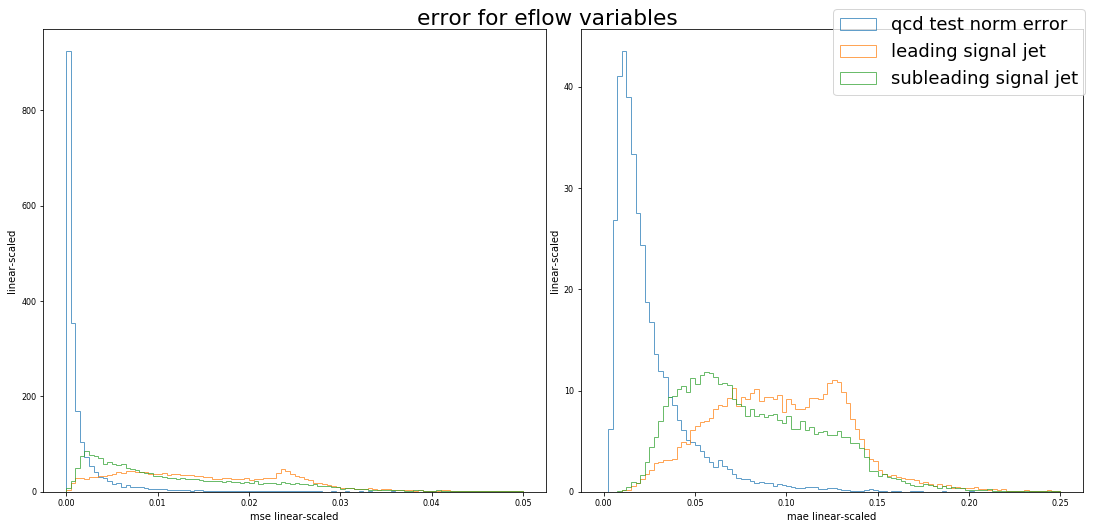

In [59]:
e.error(split_by_leading_jet=1, bins=100, rng=((0,0.05), (0, 0.25)), normed=1, yscale='linear')

In [21]:
import numpy as np 

bins = 21312
rng=(-4,4)
d = np.random.normal(size=1000)
cnts, bin_spc = np.histogram(d, range=rng, bins=bins)
(bin_spc == np.linspace(rng[0], rng[1], bins + 1)).all()

True

In [3]:
e.fill_at_threshold(0.02)

Welcome to JupyROOT 6.12/06
saving root file at /afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/autoencode/module/autoencodeSVJ/hlf_eflow3_16_v0_signal.root
saving root file at /afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/autoencode/module/autoencodeSVJ/hlf_eflow3_16_v0_qcd.root


{u'/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/autoencode/module/autoencodeSVJ/hlf_eflow3_16_v0_qcd.root': [array([37, 23, 18, ..., 15, 18, 21]),
  array([10, 33, 20, 15, 22, 18,  5,  4,  3, 22, 24, 22, 31, 23,  7,  5,  7,
          8, 21,  4, 17, 19, 27, 24, 26, 23, 23, 18, 13,  5, 24, 17, 21, 22,
         17, 18,  4, 28,  9, 25, 45, 19, 24, 19, 18, 36, 23,  6, 17, 26, 24,
          5, 21, 20, 30]),
  array([ 7,  7,  6, 19, 10])],
 u'/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/autoencode/module/autoencodeSVJ/hlf_eflow3_16_v0_signal.root': [array([14, 17, 19, 18, 17, 18, 16, 16, 17, 19, 21, 10, 22, 19, 18, 17, 18,
         19, 16, 17,  6, 19, 17, 16, 18, 17, 18, 15, 15, 17, 18, 17, 20, 17,
         18, 20, 10, 18, 19, 16, 14, 15, 18, 19, 21,  8, 16, 21, 19, 17, 18,
         20, 16, 18, 19, 17, 11, 17, 18, 20, 18, 16, 18, 17, 17, 17, 13, 17,
         18, 14, 22, 18, 14, 19, 17, 33, 18, 20, 17, 18, 16, 14, 20, 17, 15,
         14, 1

In [37]:
cuts = e.cut_at_threshold(.02)

# e.recon(split_by_leading_jet=1, qcd=0, cols=4, normed=1, bins=50)

In [116]:
def fill_from_cuts(self, cuts, rng=(0., 3000.), bins=50, var='MT'):
    import ROOT as rt
    import root_numpy as rtnp
    files = []
    for name,cut in cuts.items():
        f = rt.TFile(name + ".root", "RECREATE")
        histos = []
        for jet_n, idx  in cut.items():
            
            hname = name + "_{}_jet".format(jet_n)
            hist = rt.TH1F(hname, hname, bins, *rng)
            
            data = getattr(self, name + "_event").loc[idx][var]
            rtnp.fill_hist(hist, data)
            
            histos.append(hist)
        f.Write()
        files.append(f)
        
    return files
#     all_data = [[] for i in range(len(cuts.values()[0]))]
    
#     for name,cut in cuts.items():
#         for i,(k,idx) in enumerate(cut.items()):
#             data = getattr(self, name + "_event").loc[idx]
#             all_data[i].append((name, data[to_plot]))
    
#     return all_data
            
hist = fill_from_cuts(e, cuts)

In [113]:
f = hist[0]
f.W

<ROOT.TFile object ("signal.root") at 0x11cce3f0>

In [75]:
for i,d in enumerate(data):
    plot = [utils.data_table(var, name=name) for name,var in d]
    plot[0].plot(plot[1:], figname="{} tagged jets".format(i), figsize=5, figloc='upper right')

TypeError: 'int' object is not iterable

In [14]:
e.signal_event

,MET,METEta,METPhi,MT,Mjj
0,475.081085,0.875784,0.374849,1291.659188,1802.235564
1,463.222778,2.061815,-1.783821,950.587393,1515.287491
2,436.396362,0.126562,1.159129,1115.410433,1622.139027
3,472.754791,1.152981,0.373902,1252.156979,1816.854193
4,612.384521,-0.466784,-1.089815,813.417417,1506.764892
5,506.113739,2.092921,-2.873228,1225.698285,1828.269432
6,557.019775,2.143707,2.393610,1233.778540,1923.643462
7,529.519348,-1.956288,1.715536,1174.290399,1863.081190
8,582.397705,-2.485591,2.454824,1166.909151,1832.037180
9,525.504639,1.974988,2.231837,1080.815447,1689.310395


In [ ]:
# e.error(split_by_leading_jet=True, bins=80, rng=((0., 0.012), (0, 0.1)), yscale='linear', normed=1)

In [7]:
import pandas as pd
import numpy as np

self = e
def grab_jet_tags(
    self,
    error_threshold,
    error_metric="mae",
):
    stag = [err[error_metric] > error_threshold for err in self.signal_err_jets]
    qtag = [err[error_metric] > error_threshold for err in self.qcd_err_jets]
    

    qcd_tag_idx = get_event_index(qtag)
#     return qcd_tag_idx, qtag
    qcd_tag_data = [q.loc[qcd_tag_idx + i] for i,q in enumerate(qtag)]
    
    qcd_jet_tags = utils.data_table(
        pd.DataFrame(
            np.asarray(qcd_tag_data).T,
            columns=['jet {}'.format(i) for i in range(len(qtag))],
            index=qcd_tag_idx/2,
        ),
        name='qcd jet tags',
    )
    
    signal_tag_idx = get_event_index(stag)
    signal_tag_data = [s.loc[signal_tag_idx + i] for i,s in enumerate(stag)]

    signal_jet_tags = utils.data_table(
        pd.DataFrame(
            np.asarray(signal_tag_data).T,
            columns=['jet {}'.format(i) for i in range(len(stag))],
            index=signal_tag_idx/2,
        ),
        name='signal jet tags',
    )
    
    return tagged_jet_dict(signal_jet_tags), tagged_jet_dict(qcd_jet_tags)
    
def get_event_index(jet_tags):
    """Get all events index ids from a list of N jet tags 
    in which all N jets originated from that event.
    """
    assert len(jet_tags) > 0
    ret = set(jet_tags[0].index)
    to_add = jet_tags[1:]
    
    for i,elt in enumerate(to_add):
        ret = ret.intersection(elt.index - i - 1)
    
    return np.sort(np.asarray(list(ret)))

def tagged_jet_dict(tags):
    """Dictionary tags
    """
    return dict(
        [
            (
                i,
                tags[tags.sum(axis=1) == i].index
            ) for i in range(tags.shape[1] + 1)
        ]
    )

In [8]:
signal_tags, qcd_tags = grab_jet_tags(e, 0.02)

In [ ]:
sdict = tagged_jets(signal_tags)
qdict = tagged_jets(qcd_tags)

In [ ]:
sdict, qdict

In [ ]:
[i.index for i in self.qcd_jets]

In [ ]:
# even = self.qcd_err.index[self.qcd_err.index % 2 == 1]
# # self.test.loc[even].isin(self.qcd_jets[0].df).any().any()

# qcd_err_jets = [utils.data_table(self.qcd_err.loc[self.qcd_err.index % 2 == i], name=self.qcd_err.name + " jet " + str(i)) for i in range(2)]
# qcd_err_jets[0].plot(qcd_err_jets[1:] + , bins=100, rng=((0, 0.0018), (0, 0.035)), yscale='linear')
# # len(self.qcd_jets[0].df.merge(self.test.loc[even])), len(self.qcd_jets[0].df),b


# # self.qcd_jets[0]

e.qcd_err_jets[0].plot(e.qcd_err_jets[1:] + e.signal_err_jets, bins=100, normed=0, rng=((0., 0.0135), (0., 0.10)), figloc='upper right')

In [ ]:
e.signal_err_jets

In [ ]:
set(qcd_err_jets[0].index).issubset(self.qcd_jets[0].index)

In [ ]:
self.test_norm.head()
self.test.head()

In [ ]:
self.qcd.head()

In [ ]:
self.qcd_jets[0].head()

In [ ]:
import glob
d = utils.data_loader("test", verbose=0)
for f in glob.glob("../../../data/background/base_3/*.h5"):
    d.add_sample(f)

In [ ]:
e.train.loc[11473]

In [ ]:
ret[0]

In [ ]:
j1.head() == self.qcd_jets[0].head()

In [ ]:
utils.get_recon_errors([self.], self.ae)

In [ ]:
def error_from_un_normed()